In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color
from skimage.exposure import histogram
from skimage.feature import canny
from skimage.filters import sobel
from sklearn.decomposition import PCA
from tqdm import tqdm

In [6]:
dataset_path = r"C:\Users\justf\ML-21CSC304J\dataset_updated"

In [11]:
image_shapes = []
image_histograms = []
sobel_edge_stats = []
canny_edge_stats = []
skipped_images = []

# Iterate over the images in the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in tqdm(files):
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            try:
                # Read the image
                img = io.imread(os.path.join(root, file))
                
                # Debugging print statements
                if img is None:
                    print(f"Image {file} could not be read, skipping.")
                    skipped_images.append(file)
                    continue
                
                # Convert to grayscale if not already (just to be sure)
                if len(img.shape) == 3 or len(img.shape) == 4:
                    # If the image has an alpha channel (4 channels), remove the alpha channel
                    if img.shape[-1] == 4:
                        img = img[:, :, :3]
                    img = color.rgb2gray(img)
                
                # Collect image shape
                image_shapes.append(img.shape)
                
                # Calculate histogram
                hist, hist_centers = histogram(img)
                image_histograms.append(hist)
                
                # Calculate Sobel edge magnitude
                sobel_edges = sobel(img)
                sobel_edge_stats.append(sobel_edges.mean())
                
                # Calculate Canny edges
                canny_edges = canny(img)
                canny_edge_stats.append(canny_edges.mean())
            
            except Exception as e:
                print(f"Could not process image {file}: {e}")
                skipped_images.append(file)
                continue

100%|██████████| 1/1 [00:00<00:00, 1002.22it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
 14%|█▍        | 105/761 [00:08<00:41, 15.81it/s]

Could not process image 249.jpg: need at least one array to stack


 17%|█▋        | 129/761 [00:10<00:54, 11.69it/s]

Could not process image 304.jpg: need at least one array to stack


 24%|██▎       | 180/761 [00:13<00:45, 12.76it/s]

Could not process image 356.jpg: need at least one array to stack


 13%|█▎        | 268/2080 [00:22<02:05, 14.48it/s]

Could not process image 331.jpg: need at least one array to stack


 30%|██▉       | 618/2080 [00:55<02:12, 11.01it/s]

Could not process image 69.jpg: need at least one array to stack


  0%|          | 6/2129 [00:00<01:51, 19.04it/s]

Could not process image 0000.jpg: need at least one array to stack


  1%|▏         | 27/2129 [00:00<01:06, 31.40it/s]

Could not process image 0025.jpg: need at least one array to stack


  2%|▏         | 53/2129 [00:01<00:58, 35.45it/s]

Could not process image 0050.jpg: need at least one array to stack


  4%|▎         | 77/2129 [00:02<01:01, 33.41it/s]

Could not process image 0075.jpg: need at least one array to stack


  6%|▌         | 119/2129 [00:03<00:55, 35.96it/s]

Could not process image 0125.jpg: need at least one array to stack


  7%|▋         | 141/2129 [00:04<00:55, 36.08it/s]

Could not process image 0150.jpg: need at least one array to stack


  8%|▊         | 166/2129 [00:04<00:57, 34.37it/s]

Could not process image 0175.jpg: need at least one array to stack


  9%|▉         | 193/2129 [00:05<00:50, 38.13it/s]

Could not process image 0200.jpg: need at least one array to stack


 10%|█         | 214/2129 [00:06<00:58, 32.52it/s]

Could not process image 0225.jpg: need at least one array to stack


 11%|█         | 236/2129 [00:06<00:51, 36.57it/s]

Could not process image 0250.jpg: need at least one array to stack


 12%|█▏        | 261/2129 [00:07<00:52, 35.76it/s]

Could not process image 0275.jpg: need at least one array to stack


 14%|█▍        | 302/2129 [00:08<00:49, 36.62it/s]

Could not process image 0325.jpg: need at least one array to stack


 15%|█▌        | 324/2129 [00:09<00:50, 35.92it/s]

Could not process image 0350.jpg: need at least one array to stack


 16%|█▋        | 346/2129 [00:09<00:43, 40.86it/s]

Could not process image 0375.jpg: need at least one array to stack


 17%|█▋        | 365/2129 [00:10<00:44, 39.27it/s]

Could not process image 0400.jpg: need at least one array to stack


 18%|█▊        | 392/2129 [00:11<00:44, 39.23it/s]

Could not process image 0425.jpg: need at least one array to stack


 19%|█▉        | 410/2129 [00:11<00:51, 33.58it/s]

Could not process image 0450.jpg: need at least one array to stack


 20%|██        | 433/2129 [00:12<00:45, 36.97it/s]

Could not process image 0475.jpg: need at least one array to stack


 21%|██▏       | 456/2129 [00:12<00:49, 33.82it/s]

Could not process image 0500.jpg: need at least one array to stack


 23%|██▎       | 482/2129 [00:13<00:44, 37.07it/s]

Could not process image 0525.jpg: need at least one array to stack


 24%|██▎       | 504/2129 [00:14<00:45, 36.01it/s]

Could not process image 0550.jpg: need at least one array to stack


 25%|██▍       | 526/2129 [00:14<00:44, 36.38it/s]

Could not process image 0575.jpg: need at least one array to stack


 26%|██▌       | 548/2129 [00:15<00:43, 36.61it/s]

Could not process image 0600.jpg: need at least one array to stack


 27%|██▋       | 569/2129 [00:16<00:43, 35.64it/s]

Could not process image 0625.jpg: need at least one array to stack


 28%|██▊       | 596/2129 [00:16<00:40, 37.70it/s]

Could not process image 0650.jpg: need at least one array to stack


 29%|██▉       | 618/2129 [00:17<00:42, 35.50it/s]

Could not process image 0675.jpg: need at least one array to stack


 30%|███       | 644/2129 [00:18<00:39, 37.59it/s]

Could not process image 0700.jpg: need at least one array to stack


 31%|███       | 665/2129 [00:18<00:41, 35.41it/s]

Could not process image 0725.jpg: need at least one array to stack


 32%|███▏      | 688/2129 [00:19<00:38, 37.74it/s]

Could not process image 0750.jpg: need at least one array to stack


 33%|███▎      | 713/2129 [00:20<00:42, 33.51it/s]

Could not process image 0775.jpg: need at least one array to stack


 34%|███▍      | 734/2129 [00:20<00:39, 35.58it/s]

Could not process image 0800.jpg: need at least one array to stack


 35%|███▌      | 752/2129 [00:21<00:38, 36.05it/s]

Could not process image 0825.jpg: need at least one array to stack


 36%|███▋      | 775/2129 [00:21<00:34, 39.48it/s]

Could not process image 0850.jpg: need at least one array to stack


 37%|███▋      | 797/2129 [00:22<00:36, 36.88it/s]

Could not process image 0875.jpg: need at least one array to stack


 38%|███▊      | 819/2129 [00:22<00:34, 37.73it/s]

Could not process image 0900.jpg: need at least one array to stack


 40%|███▉      | 845/2129 [00:23<00:36, 35.36it/s]

Could not process image 0925.jpg: need at least one array to stack


 41%|████      | 869/2129 [00:24<00:38, 32.84it/s]

Could not process image 0950.jpg: need at least one array to stack


 42%|████▏     | 893/2129 [00:24<00:33, 37.41it/s]

Could not process image 0975.jpg: need at least one array to stack


 43%|████▎     | 915/2129 [00:25<00:31, 38.18it/s]

Could not process image 1000.jpg: need at least one array to stack


 44%|████▍     | 939/2129 [00:26<00:27, 43.92it/s]

Could not process image 1025.jpg: need at least one array to stack


 45%|████▌     | 960/2129 [00:26<00:26, 44.83it/s]

Could not process image 1050.jpg: need at least one array to stack


 46%|████▌     | 980/2129 [00:27<00:27, 42.21it/s]

Could not process image 1075.jpg: need at least one array to stack


 47%|████▋     | 1000/2129 [00:27<00:30, 37.54it/s]

Could not process image 1100.jpg: need at least one array to stack


 48%|████▊     | 1024/2129 [00:28<00:30, 36.76it/s]

Could not process image 1125.jpg: need at least one array to stack


 50%|█████     | 1070/2129 [00:29<00:26, 39.68it/s]

Could not process image 1175.jpg: need at least one array to stack


 51%|█████     | 1090/2129 [00:30<00:28, 36.95it/s]

Could not process image 1200.jpg: need at least one array to stack


 52%|█████▏    | 1111/2129 [00:30<00:28, 35.91it/s]

Could not process image 1225.jpg: need at least one array to stack


 54%|█████▍    | 1157/2129 [00:31<00:25, 37.48it/s]

Could not process image 1275.jpg: need at least one array to stack


 55%|█████▌    | 1179/2129 [00:32<00:25, 37.78it/s]

Could not process image 1300.jpg: need at least one array to stack


 56%|█████▋    | 1200/2129 [00:32<00:26, 34.78it/s]

Could not process image 1325.jpg: need at least one array to stack


 58%|█████▊    | 1228/2129 [00:33<00:21, 41.55it/s]

Could not process image 1350.jpg: need at least one array to stack


 59%|█████▊    | 1247/2129 [00:34<00:23, 37.49it/s]

Could not process image 1375.jpg: need at least one array to stack


 60%|█████▉    | 1270/2129 [00:34<00:21, 40.09it/s]

Could not process image 1400.jpg: need at least one array to stack


 61%|██████    | 1294/2129 [00:35<00:21, 38.83it/s]

Could not process image 1425.jpg: need at least one array to stack


 62%|██████▏   | 1317/2129 [00:36<00:21, 37.58it/s]

Could not process image 1450.jpg: need at least one array to stack


 63%|██████▎   | 1341/2129 [00:36<00:19, 40.86it/s]

Could not process image 1475.jpg: need at least one array to stack


 64%|██████▍   | 1364/2129 [00:37<00:19, 38.61it/s]

Could not process image 1500.jpg: need at least one array to stack


 65%|██████▌   | 1386/2129 [00:37<00:18, 39.18it/s]

Could not process image 1525.jpg: need at least one array to stack


 67%|██████▋   | 1429/2129 [00:38<00:20, 34.06it/s]

Could not process image 1575.jpg: need at least one array to stack


 70%|██████▉   | 1481/2129 [00:40<00:15, 42.18it/s]

Could not process image 1625.jpg: need at least one array to stack


 71%|███████   | 1502/2129 [00:40<00:14, 42.32it/s]

Could not process image 1650.jpg: need at least one array to stack


 71%|███████▏  | 1521/2129 [00:41<00:17, 34.33it/s]

Could not process image 1675.jpg: need at least one array to stack


 72%|███████▏  | 1543/2129 [00:41<00:15, 38.46it/s]

Could not process image 1700.jpg: need at least one array to stack


 74%|███████▎  | 1568/2129 [00:42<00:14, 39.24it/s]

Could not process image 1725.jpg: need at least one array to stack


 74%|███████▍  | 1586/2129 [00:43<00:15, 35.84it/s]

Could not process image 1750.jpg: need at least one array to stack


 76%|███████▌  | 1608/2129 [00:43<00:14, 36.24it/s]

Could not process image 1775.jpg: need at least one array to stack


 77%|███████▋  | 1635/2129 [00:44<00:13, 37.99it/s]

Could not process image 1800.jpg: need at least one array to stack


 78%|███████▊  | 1654/2129 [00:44<00:13, 35.70it/s]

Could not process image 1825.jpg: need at least one array to stack


 79%|███████▊  | 1676/2129 [00:45<00:12, 36.63it/s]

Could not process image 1850.jpg: need at least one array to stack


 80%|███████▉  | 1697/2129 [00:46<00:11, 37.54it/s]

Could not process image 1875.jpg: need at least one array to stack


 81%|████████  | 1718/2129 [00:46<00:10, 40.36it/s]

Could not process image 1900.jpg: need at least one array to stack


 82%|████████▏ | 1740/2129 [00:47<00:10, 35.92it/s]

Could not process image 1925.jpg: need at least one array to stack


 83%|████████▎ | 1761/2129 [00:47<00:10, 33.86it/s]

Could not process image 1950.jpg: need at least one array to stack


 84%|████████▍ | 1788/2129 [00:48<00:09, 37.36it/s]

Could not process image 1975.jpg: need at least one array to stack


 85%|████████▌ | 1816/2129 [00:49<00:07, 39.30it/s]

Could not process image 2000.jpg: need at least one array to stack


 86%|████████▌ | 1836/2129 [00:49<00:07, 39.15it/s]

Could not process image 2025.jpg: need at least one array to stack


 87%|████████▋ | 1856/2129 [00:50<00:07, 38.35it/s]

Could not process image 2050 20.26.31.jpg: need at least one array to stack


 88%|████████▊ | 1879/2129 [00:51<00:06, 35.99it/s]

Could not process image 2075.jpg: need at least one array to stack


 89%|████████▉ | 1901/2129 [00:51<00:06, 35.94it/s]

Could not process image 2100.jpg: need at least one array to stack


 90%|█████████ | 1923/2129 [00:52<00:05, 35.59it/s]

Could not process image 2125.jpg: need at least one array to stack


 91%|█████████▏| 1945/2129 [00:52<00:04, 36.93it/s]

Could not process image 2150.jpg: need at least one array to stack


 93%|█████████▎| 1971/2129 [00:53<00:04, 34.06it/s]

Could not process image 2175.jpg: need at least one array to stack


 96%|█████████▌| 2040/2129 [00:55<00:02, 39.78it/s]

Could not process image 2250.jpg: need at least one array to stack


 98%|█████████▊| 2080/2129 [00:56<00:01, 39.54it/s]

Could not process image 2300.jpg: need at least one array to stack


 99%|█████████▉| 2104/2129 [00:56<00:00, 38.80it/s]

Could not process image 2325.jpg: need at least one array to stack


100%|█████████▉| 2126/2129 [00:57<00:00, 37.20it/s]

Could not process image 2350.jpg: need at least one array to stack


  1%|          | 10/1746 [00:00<03:08,  9.22it/s]

Could not process image 107.jpg: need at least one array to stack


  4%|▎         | 65/1746 [00:05<01:43, 16.18it/s]

Could not process image 168.jpg: need at least one array to stack


  5%|▍         | 87/1746 [00:07<01:45, 15.78it/s]

Could not process image 190 18.59.45.jpg: need at least one array to stack


  5%|▌         | 94/1746 [00:07<01:53, 14.56it/s]

Could not process image 200.jpg: need at least one array to stack


  6%|▌         | 105/1746 [00:08<02:01, 13.47it/s]

Could not process image 210.jpg: need at least one array to stack


  8%|▊         | 148/1746 [00:13<02:00, 13.30it/s]

Could not process image 261.jpg: need at least one array to stack


 10%|█         | 177/1746 [00:16<03:03,  8.55it/s]c:\Users\justf\ML-21CSC304J\venv\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 15%|█▍        | 254/1746 [00:23<01:53, 13.17it/s]

Could not process image 374.jpg: Could not find a backend to open `C:\Users\justf\ML-21CSC304J\dataset_updated\training_set\sculpture\374.jpg`` with iomode `r`.


100%|██████████| 1746/1746 [01:12<00:00, 24.12it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
 14%|█▍        | 34/236 [00:00<00:05, 36.68it/s]

Could not process image 0300.jpg: need at least one array to stack


 49%|████▉     | 116/236 [00:03<00:03, 38.67it/s]

Could not process image 1150.jpg: need at least one array to stack


 53%|█████▎    | 124/236 [00:03<00:03, 30.90it/s]

Could not process image 1250.jpg: need at least one array to stack


 65%|██████▍   | 153/236 [00:04<00:02, 32.41it/s]

Could not process image 1550.jpg: need at least one array to stack
Could not process image 1600.jpg: need at least one array to stack


 92%|█████████▏| 217/236 [00:06<00:00, 33.55it/s]

Could not process image 2200.jpg: need at least one array to stack
Could not process image 2225.jpg: need at least one array to stack


 98%|█████████▊| 231/236 [00:06<00:00, 33.97it/s]

Could not process image 2275.jpg: need at least one array to stack


  1%|          | 2/193 [00:00<00:10, 17.52it/s]

Could not process image 106.jpg: need at least one array to stack


  4%|▎         | 7/193 [00:00<00:24,  7.50it/s]

Could not process image 170.jpg: need at least one array to stack


100%|██████████| 193/193 [00:07<00:00, 24.23it/s]


In [13]:
skipped_images_np = np.array(skipped_images)
skipped_images_df = pd.DataFrame(skipped_images_np, columns=["Skipped Images"])

skipped_images_df.head()    

,Skipped Images
0,249.jpg
1,304.jpg
2,356.jpg
3,331.jpg
4,69.jpg


In [14]:
skipped_images_df.to_csv("skipped_images.csv", index=False)

In [16]:
if image_shapes and image_histograms and sobel_edge_stats and canny_edge_stats:
    # Convert lists to pandas DataFrame for easier analysis
    df_shapes = pd.DataFrame(image_shapes, columns=['Height', 'Width'])
    df_histograms = pd.DataFrame(image_histograms)
    df_sobel = pd.DataFrame(sobel_edge_stats, columns=['Sobel Edge Magnitude'])
    df_canny = pd.DataFrame(canny_edge_stats, columns=['Canny Edge Magnitude'])

In [18]:
print("Image Dimensions Analysis")
print(df_shapes.describe())

Image Dimensions Analysis
            Height        Width
count  8577.000000  8577.000000
mean    369.410983   355.088842
std     145.186099   150.923078
min      92.000000    37.000000
25%     320.000000   267.000000
50%     320.000000   290.000000
75%     370.000000   427.000000
max    1512.000000  2016.000000


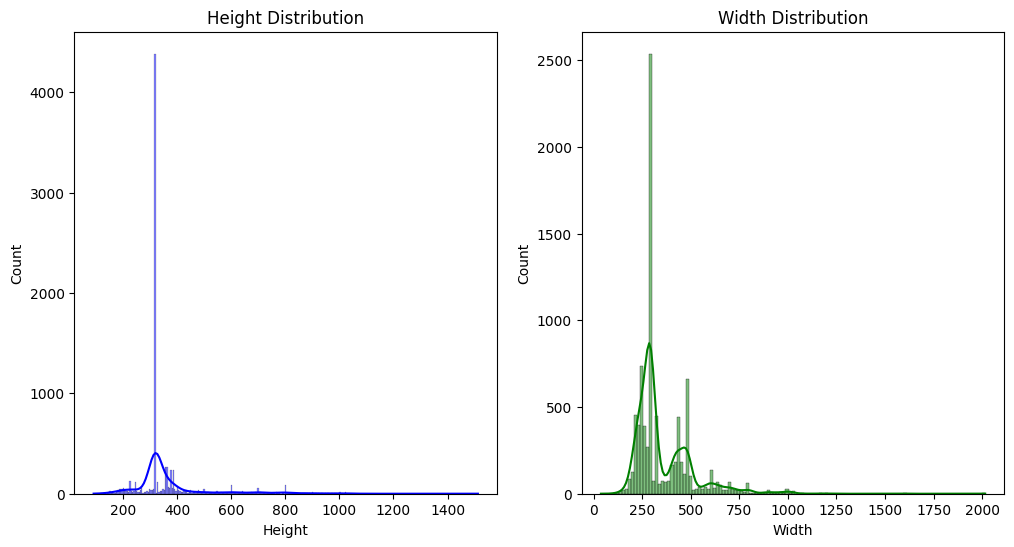

In [20]:
# Plotting histograms of height and width
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_shapes['Height'], kde=True, color='blue')
plt.title('Height Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_shapes['Width'], kde=True, color='green')
plt.title('Width Distribution')
plt.show()

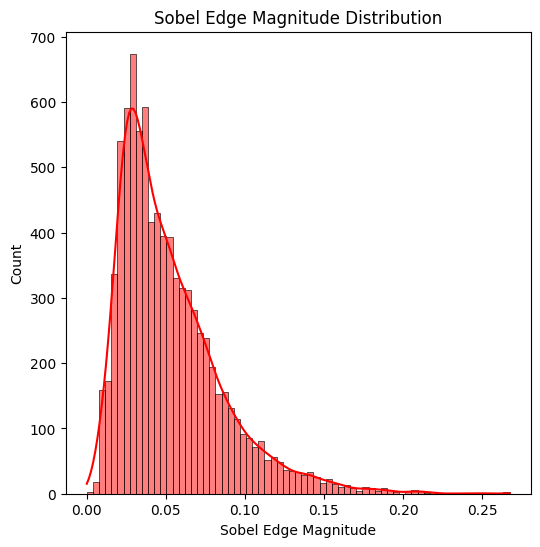

In [21]:
# Sobel Edge Magnitude Analysis
plt.figure(figsize=(6, 6))
sns.histplot(df_sobel['Sobel Edge Magnitude'], kde=True, color='red')
plt.title('Sobel Edge Magnitude Distribution')
plt.show()

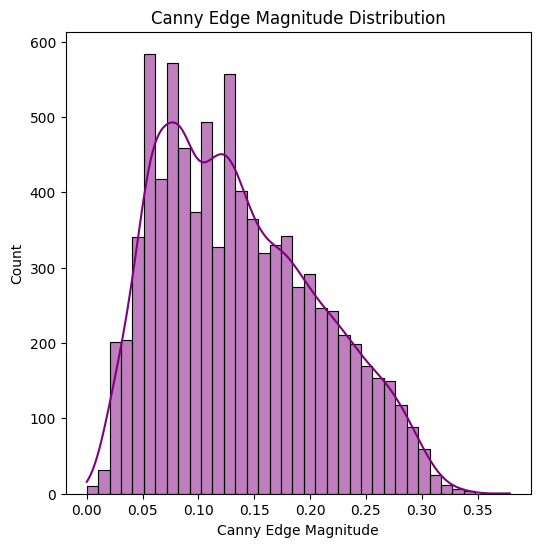

In [22]:
# Canny Edge Magnitude Analysis
plt.figure(figsize=(6, 6))
sns.histplot(df_canny['Canny Edge Magnitude'], kde=True, color='purple')
plt.title('Canny Edge Magnitude Distribution')
plt.show()

Missing values in df_histograms:
0      0
1      0
2      0
3      0
4      0
      ..
251    4
252    4
253    4
254    4
255    4
Length: 256, dtype: int64
Missing values in df_histograms_clean:
0      0
1      0
2      0
3      0
4      0
      ..
251    0
252    0
253    0
254    0
255    0
Length: 256, dtype: int64
PCA Results:
[[ 5027.51117965  6616.52862331]
 [ -642.6730145  14469.38410318]
 [-3673.6902895  -5452.85908317]
 ...
 [-3480.82579658 -1163.74393323]
 [-3648.81501377 -5073.30488854]
 [-3604.34422916   908.88406671]]


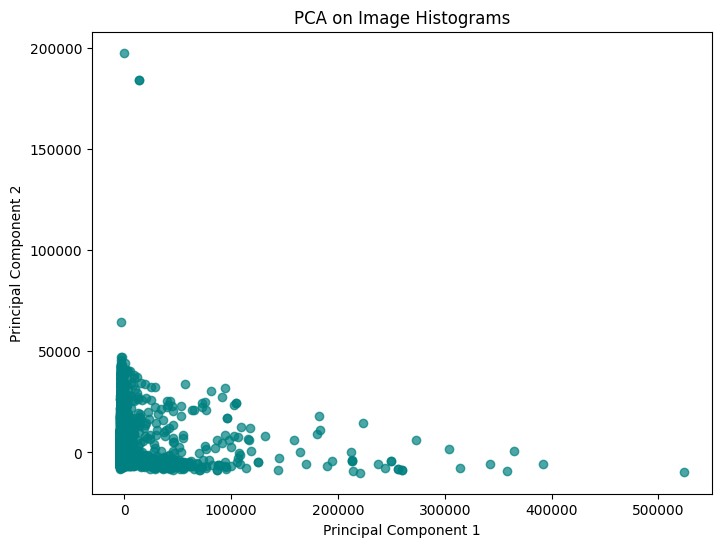

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA

# Assuming df_histograms is your DataFrame with histogram data
# Check for missing values
print("Missing values in df_histograms:")
print(df_histograms.isna().sum())

# Option 1: Drop rows with missing values
df_histograms_clean = df_histograms.dropna()

# Option 2: Alternatively, fill missing values with the mean of the column
# df_histograms_clean = df_histograms.fillna(df_histograms.mean())

# Check if there are any missing values left
print("Missing values in df_histograms_clean:")
print(df_histograms_clean.isna().sum())

# Apply PCA
pca = PCA(n_components=2)
hist_pca = pca.fit_transform(df_histograms_clean)

# Display the results
print("PCA Results:")
print(hist_pca)

# Plotting PCA results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(hist_pca[:, 0], hist_pca[:, 1], alpha=0.7, color='teal')
plt.title('PCA on Image Histograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
